In [44]:
from sklearn.preprocessing import PolynomialFeatures
import pandas_profiling as ppf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

pd.set_option('display.max_columns', 50)

In [3]:
train = pd.read_csv('.\\data\\first_round_training_data.csv')
test = pd.read_csv('.\\data\\first_round_testing_data.csv')
submit_example = pd.read_csv('.\\data\\submit_example.csv')

print('shape of train:', train.shape)
print('shape of test:', test.shape)
print('shape of submit:', submit_example.shape)

shape of train: (6000, 21)
shape of test: (6000, 11)
shape of submit: (120, 5)


In [4]:
train.head()

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Quality_label
0,0.001660,0.591013,147.608373,38.186345,0.000421,0.000612,2286.523413,0.035407,0.593081,1.010385,6.856075,0.168761,1.098755,36.955992,8.454598,11.438066,177.243120,338.729256,2.021704,0.079526,Pass
1,1.601749,0.015052,0.035864,51.130326,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,0.000362,11.649033,0.066671,225.632949,0.481860,20597.447822,3.723330,15.376190,0.986973,4.634376,Fail
2,0.098039,69.233685,0.080920,0.112265,0.000909,0.001972,2286.523413,0.035407,0.593081,1.010385,0.022201,0.078213,110.079689,2.208138,0.073525,236.079314,0.064196,0.576302,33.875790,1.813727,Fail
3,18.181860,0.047325,0.018061,1.098102,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,1.459004,0.380281,0.011491,0.654517,0.025872,176.948915,0.029777,0.246726,27.117165,0.081819,Fail
4,0.012085,0.008749,0.005509,524.327396,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,11.576647,1.555672,38.613386,0.260989,0.009380,194.798039,0.055053,0.014725,13.569707,18.138496,Fail


In [5]:
test.head().append(test.tail())

,Group,Parameter1,Parameter10,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9
0,0,0.235279,0.195680,0.351488,0.186814,0.086456,1.434060,1.230409,0.038483,2.931083,2.005852
1,0,0.043799,0.523976,32.590688,0.886285,29.702490,0.027434,0.016852,0.600827,0.118077,887.611257
2,0,21.466737,0.523976,11.847792,79499.554454,13544.605343,0.027434,0.016852,0.600827,0.118077,887.611257
3,0,0.703795,0.010192,0.018080,317.015599,38.087562,0.428092,0.314162,0.038483,17.850021,0.051850
4,0,10.447960,0.010192,15.983891,0.996049,16.715690,0.477823,0.464037,0.038483,17.850021,0.051850
5995,119,765.876721,51.944717,0.053836,0.258969,0.125856,0.000218,0.000414,2286.523413,0.035407,0.593081
5996,119,0.071211,0.195680,0.924208,284.265495,15.668770,3.095123,1.817391,0.600827,17.850021,6.783967
5997,119,0.001922,0.073078,7.829744,16.138304,0.000376,0.741630,1.495371,0.600827,17.850021,0.051850
5998,119,0.000054,0.027291,0.672029,0.002134,0.149019,3.454681,3.262468,0.600827,17.850021,6.783967
5999,119,1.026527,0.073078,0.116152,2.923321,610.091923,1.031282,0.833011,0.038483,2.931083,2.005852


In [6]:
submit_example.head()

,Group,Excellent ratio,Good ratio,Pass ratio,Fail ratio
0,0,0.4,0.2,0.2,0.2
1,1,0.4,0.2,0.2,0.2
2,2,0.4,0.2,0.2,0.2
3,3,0.4,0.2,0.2,0.2
4,4,0.4,0.2,0.2,0.2


In [7]:
features = ['Parameter1', 'Parameter2', 'Parameter3', 'Parameter4', 'Parameter5',
            'Parameter6', 'Parameter7', 'Parameter8', 'Parameter9', 'Parameter10',
            'Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
            'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10']
test_features = ['Parameter1', 'Parameter10', 'Parameter2', 'Parameter3',
                 'Parameter4', 'Parameter5', 'Parameter6', 'Parameter7', 
                 'Parameter8', 'Parameter9']

for feature in features:
    train[feature] = np.log1p(train[feature]).astype(np.float32)
    
for feature in test_features:
    test[feature] = np.log1p(test[feature]).astype(np.float32)

In [8]:
train.head()

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Quality_label
0,0.001659,0.464371,5.001315,3.668328,0.000421,0.000612,7.735225,0.034795,0.46567,0.698326,2.061287,0.155944,0.741345,3.636427,2.246501,2.520762,5.183148,5.828149,1.105821,0.076522,Pass
1,0.956184,0.014940,0.035236,3.953747,0.000909,0.002394,7.735225,0.034795,0.46567,0.698326,0.000362,2.537581,0.064542,5.423332,0.393298,9.932971,1.552514,2.795829,0.686612,1.728886,Fail
2,0.093526,4.251828,0.077813,0.106399,0.000909,0.001970,7.735225,0.034795,0.46567,0.698326,0.021958,0.075305,4.710248,1.165691,0.070947,5.468395,0.062219,0.455081,3.551793,1.034510,Fail
3,2.953965,0.046239,0.017900,0.741033,0.000909,0.002394,7.735225,0.034795,0.46567,0.698326,0.899756,0.322287,0.011426,0.503509,0.025543,5.181497,0.029342,0.220521,3.336380,0.078644,Fail
4,0.012013,0.008711,0.005493,6.264022,0.000909,0.002394,7.735225,0.034795,0.46567,0.698326,2.531842,0.938315,3.679167,0.231896,0.009336,5.277084,0.053591,0.014618,2.678945,2.951702,Fail


In [ ]:
pfr = ppf.ProfileReport(train)
pfr.to_file('train_EDA.html')

### 异常点观察

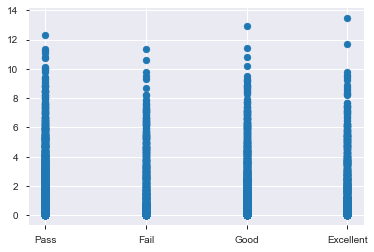

In [9]:
plt.scatter(train.Quality_label, train.Parameter1)
# 剔除train.Parameter1>12的数据

In [10]:
train = train[train.Parameter1<=12]

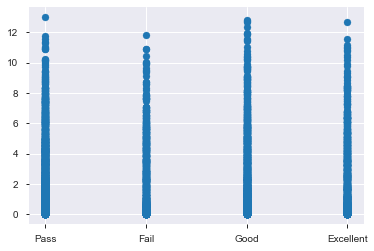

In [14]:
plt.scatter(train.Quality_label, train.Parameter2)
# 剔除train.Parameter2>14的数据

In [12]:
train = train[train.Parameter2<=14]

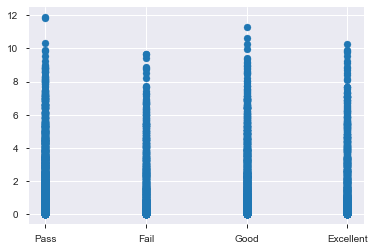

In [17]:
plt.scatter(train.Quality_label, train.Parameter3)
# 剔除train.Parameter3>12的数据

In [16]:
train = train[train.Parameter3<=12]

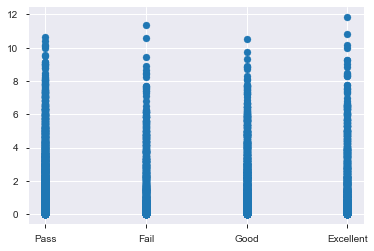

In [18]:
plt.scatter(train.Quality_label, train.Parameter4)

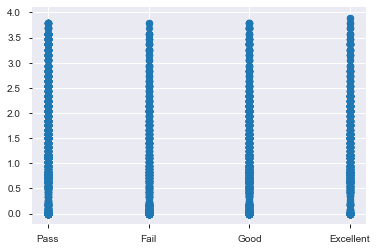

In [21]:
plt.scatter(train.Quality_label, train.Parameter5)
# 剔除train.Parameter5>4的数据

In [20]:
train = train[train.Parameter5<=4]

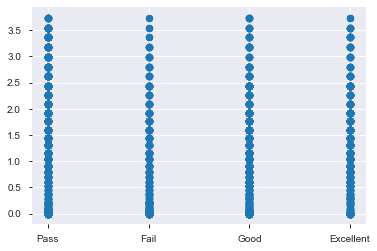

In [22]:
plt.scatter(train.Quality_label, train.Parameter6)

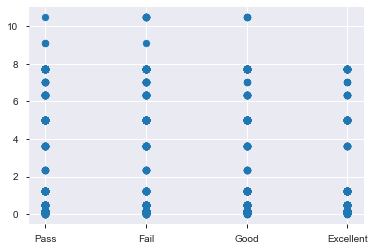

In [23]:
plt.scatter(train.Quality_label, train.Parameter7)

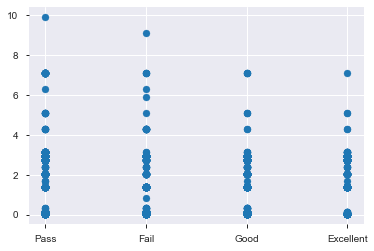

In [24]:
plt.scatter(train.Quality_label, train.Parameter8)
# 剔除train.Parameter8>8的数据

In [25]:
train = train[train.Parameter8<=8]

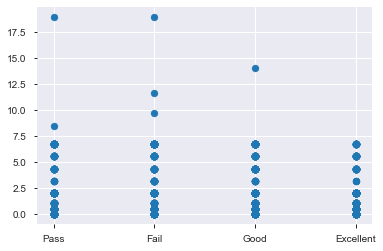

In [26]:
plt.scatter(train.Quality_label, train.Parameter9)
# 剔除train.Parameter9>12的数据

In [27]:
train = train[train.Parameter9<=12]

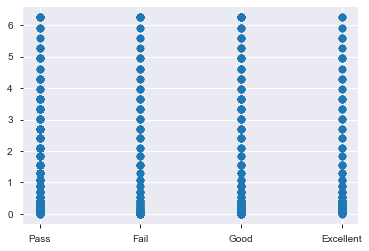

In [28]:
plt.scatter(train.Quality_label, train.Parameter10)

In [ ]:
plt.scatter(train.Quality_label, train.Attribute1)
# 剔除train.Attribute1>17的数据

In [ ]:
plt.scatter(train.Quality_label, train.Attribute2)
# 剔除train.Attribute2>17的数据

In [ ]:
plt.scatter(train.Quality_label, train.Attribute3)
# 剔除train.Attribute3>11的数据

In [ ]:
plt.scatter(train.Quality_label, train.Attribute4)
# 剔除train.Attribute4>15的数据

In [ ]:
plt.scatter(train.Quality_label, train.Attribute5)
# 剔除train.Attribute5>20的数据

In [ ]:
plt.scatter(train.Quality_label, train.Attribute6)
# 剔除train.Attribute6>15的数据

In [ ]:
plt.scatter(train.Quality_label, train.Attribute7)
# 剔除train.Attribute7>17的数据

In [ ]:
plt.scatter(train.Quality_label, train.Attribute8)
# 剔除train.Attribute8>20的数据

In [ ]:
plt.scatter(train.Quality_label, train.Attribute9)
# 剔除train.Attribute9>20的数据

In [ ]:
plt.scatter(train.Quality_label, train.Attribute10)
# 剔除train.Attribute10>20的数据

### 构建训练数据集

In [50]:
test_features = ['Parameter1', 'Parameter10', 'Parameter2', 'Parameter3',
                 'Parameter4', 'Parameter5', 'Parameter6', 'Parameter7', 
                 'Parameter8', 'Parameter9']
trainX = train[test_features]
trainY = train.Quality_label
testX = test[test_features]

print('shape of trainX:', trainX.shape)
print('shape of trainY:', trainY.shape)
print('shape of test:', testX.shape)

shape of trainX: (5986, 10)
shape of trainY: (5986,)
shape of test: (6000, 10)


#### 数据预处理

In [51]:
trainX = PolynomialFeatures().fit_transform(trainX)
trainX

array([[1.00000000e+00, 1.65874418e-03, 6.98326230e-01, ...,
        1.21067474e-03, 1.62028726e-02, 2.16848567e-01],
       [1.00000000e+00, 9.56183910e-01, 6.98326230e-01, ...,
        1.21067474e-03, 1.62028726e-02, 2.16848567e-01],
       [1.00000000e+00, 9.35256481e-02, 6.98326230e-01, ...,
        1.21067474e-03, 1.62028726e-02, 2.16848567e-01],
       ...,
       [1.00000000e+00, 3.36758733e-01, 1.08123910e+00, ...,
        1.21067474e-03, 1.62028726e-02, 2.16848567e-01],
       [1.00000000e+00, 1.25352100e-01, 1.08123910e+00, ...,
        1.21067474e-03, 1.62028726e-02, 2.16848567e-01],
       [1.00000000e+00, 3.69307256e+00, 1.08123910e+00, ...,
        1.21067474e-03, 1.62028726e-02, 2.16848567e-01]])

In [53]:
dfX = pd.DataFrame(trainX)
dfX.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,1.0,0.001659,0.698326,0.464371,5.001315,3.668328,0.000421,0.000612,7.735225,0.034795,0.46567,0.000003,0.001158,0.000770,0.008296,0.006085,6.986032e-07,0.000001,0.012831,0.000058,0.000772,0.48766,0.324282,3.492549,2.561690,...,0.003060,38.686295,0.174020,2.328962,13.456632,0.001545,0.002244,28.375345,0.127639,1.708231,1.773790e-07,2.576873e-07,0.003258,0.000015,0.000196,3.743550e-07,0.004733,0.000021,0.000285,59.833709,0.269145,3.602062,0.001211,0.016203,0.216849
1,1.0,0.956184,0.698326,0.014940,0.035236,3.953747,0.000909,0.002394,7.735225,0.034795,0.46567,0.914288,0.667728,0.014285,0.033692,3.780509,8.689547e-04,0.002289,7.396298,0.033270,0.445266,0.48766,0.010433,0.024606,2.761005,...,0.000084,0.272561,0.001226,0.016408,15.632114,0.003593,0.009466,30.583122,0.137570,1.841141,8.258695e-07,2.175735e-06,0.007030,0.000032,0.000423,5.731924e-06,0.018519,0.000083,0.001115,59.833709,0.269145,3.602062,0.001211,0.016203,0.216849
2,1.0,0.093526,0.698326,4.251828,0.077813,0.106399,0.000909,0.001970,7.735225,0.034795,0.46567,0.008747,0.065311,0.397655,0.007277,0.009951,8.499364e-05,0.000184,0.723442,0.003254,0.043552,0.48766,2.969163,0.054339,0.074301,...,0.000153,0.601899,0.002707,0.036235,0.011321,0.000097,0.000210,0.823018,0.003702,0.049547,8.258695e-07,1.790600e-06,0.007030,0.000032,0.000423,3.882271e-06,0.015241,0.000069,0.000918,59.833709,0.269145,3.602062,0.001211,0.016203,0.216849
3,1.0,2.953965,0.698326,0.046239,0.017900,0.741033,0.000909,0.002394,7.735225,0.034795,0.46567,8.725909,2.062831,0.136589,0.052876,2.188986,2.684485e-03,0.007072,22.849584,0.102782,1.375573,0.48766,0.032290,0.012500,0.517483,...,0.000043,0.138461,0.000623,0.008336,0.549130,0.000673,0.001774,5.732059,0.025784,0.345077,8.258695e-07,2.175735e-06,0.007030,0.000032,0.000423,5.731924e-06,0.018519,0.000083,0.001115,59.833709,0.269145,3.602062,0.001211,0.016203,0.216849
4,1.0,0.012013,0.698326,0.008711,0.005493,6.264022,0.000909,0.002394,7.735225,0.034795,0.46567,0.000144,0.008389,0.000105,0.000066,0.075249,1.091701e-05,0.000029,0.092923,0.000418,0.005594,0.48766,0.006083,0.003836,4.374331,...,0.000013,0.042493,0.000191,0.002558,39.237970,0.005693,0.014997,48.453620,0.217955,2.916967,8.258695e-07,2.175735e-06,0.007030,0.000032,0.000423,5.731924e-06,0.018519,0.000083,0.001115,59.833709,0.269145,3.602062,0.001211,0.016203,0.216849


### 模型构建

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### LogisticRegression

In [31]:
lr = LogisticRegression()
lr.fit(trainX, trainY)
predY = lr.predict(testX)

d:\python36\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python36\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


#### AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier()
ada.fit(trainX, trainY)
predY = ada.predict(testX)

_________

In [32]:
results = pd.DataFrame({'Group':test.Group, 'Quality_label':predY})
results.head()

,Group,Quality_label
0,0,Pass
1,0,Fail
2,0,Fail
3,0,Good
4,0,Good


In [33]:
results['num'] = 1
results = results.pivot_table(index=['Group'], columns=['Quality_label'], values='num', aggfunc=np.sum, fill_value=0)
results.head()

Quality_label,Excellent,Fail,Good,Pass
Group,,,,
0,1,4,27,18
1,0,1,15,34
2,0,0,9,41
3,0,0,19,31
4,0,3,27,20


In [34]:
cols = ['Excellent ratio', 'Good ratio', 'Pass ratio', 'Fail ratio']
quality_labels = ['Excellent', 'Good', 'Pass', 'Fail']

for i in range(len(cols)):
    results[cols[i]] = results[quality_labels[i]].apply(lambda x: x/50.0)
    
results.drop(quality_labels, axis=1, inplace=True)
results

Quality_label,Excellent ratio,Good ratio,Pass ratio,Fail ratio
Group,,,,
0,0.02,0.54,0.36,0.08
1,0.00,0.30,0.68,0.02
2,0.00,0.18,0.82,0.00
3,0.00,0.38,0.62,0.00
4,0.00,0.54,0.40,0.06
5,0.00,0.24,0.72,0.04
6,0.02,0.28,0.68,0.02
7,0.00,0.12,0.80,0.08
8,0.00,0.08,0.92,0.00


In [42]:
results['Excellent ratio'].sum()/1.2, results['Good ratio'].sum()/1.20, results['Pass ratio'].sum()/1.20, results['Fail ratio'].sum()/1.20

(0.9666666666666668, 23.133333333333336, 71.2, 4.700000000000001)

In [43]:
results.to_csv('submission3.csv')